In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
X,y_true = make_blobs(n_samples=500,centers=3,cluster_std=0.60,random_state=42)

In [3]:
X

array([[-6.1900632 , -7.30201545],
       [ 3.02174685,  1.94059276],
       [ 5.9537606 ,  1.48819071],
       [-2.74446251,  8.13617716],
       [ 5.36060719,  1.72832446],
       [ 5.13808033,  1.45951939],
       [-5.34357647, -6.93774553],
       [ 4.80215293,  1.94302682],
       [ 3.99930658,  1.88774199],
       [-7.25451834, -6.86445496],
       [ 4.25193511,  1.32424088],
       [-1.81404028,  8.52187674],
       [-1.2293776 ,  7.84303345],
       [-2.16666332,  9.69562551],
       [ 4.81374375,  3.21841016],
       [ 5.27493353,  0.91792599],
       [-2.5524037 ,  9.61640587],
       [-7.5532604 , -6.65066375],
       [-6.8302568 , -6.24082137],
       [-3.17299861,  8.29656215],
       [ 3.80073829,  2.31095123],
       [-2.38387947,  7.83848405],
       [ 4.98581301,  2.15991978],
       [-5.94031277, -6.91955975],
       [-7.14748736, -6.7636556 ],
       [ 4.87655012,  1.720579  ],
       [ 4.48689251,  2.87556548],
       [-6.4081471 , -6.62483506],
       [-6.71939703,

In [4]:
df = pd.DataFrame(X,columns=['Feature_1','Feature_2'])

In [5]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [7]:
inertia = []
K_range = range(1,11)

In [8]:
for k in K_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [9]:
inertia

[1000.0000000000002,
 297.8954141051722,
 11.57548472310498,
 9.75206797735684,
 8.257175272446283,
 6.917577320416799,
 6.334755391595288,
 5.70417717790143,
 5.060234133532077,
 4.762361898130397]

In [10]:
import matplotlib.pyplot as plt

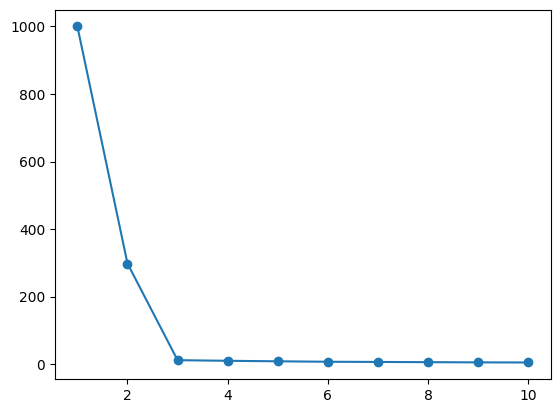

In [11]:
plt.plot(K_range,inertia, marker='o')

In [12]:
kmeans_final = KMeans(n_clusters=3,random_state=42)

In [13]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [14]:
cluster_labels

array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0,

In [15]:
df['clusters'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

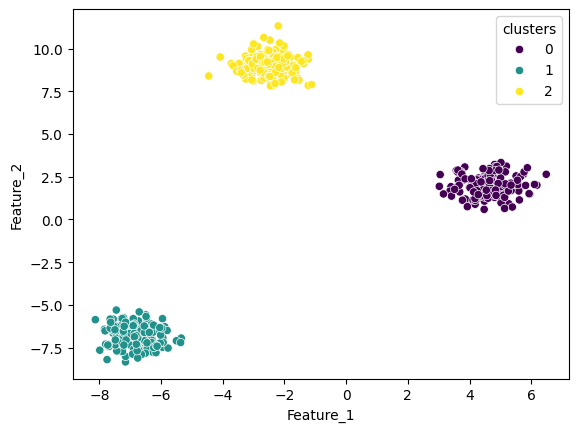

In [16]:
sns.scatterplot(x = df['Feature_1'],
                y=df['Feature_2'],
                hue=df['clusters'],
                palette = 'viridis')

In [17]:
from sklearn.datasets import make_moons
X,y_true = make_moons(n_samples=500,noise=0.05,random_state=42)

In [18]:
from sklearn.cluster import KMeans, DBSCAN

In [19]:
df = pd.DataFrame(X,columns=['Feature_1','Feature_2'])

In [20]:
scaler  = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [21]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [22]:
df['kmeans_cluster'] = kmeans_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

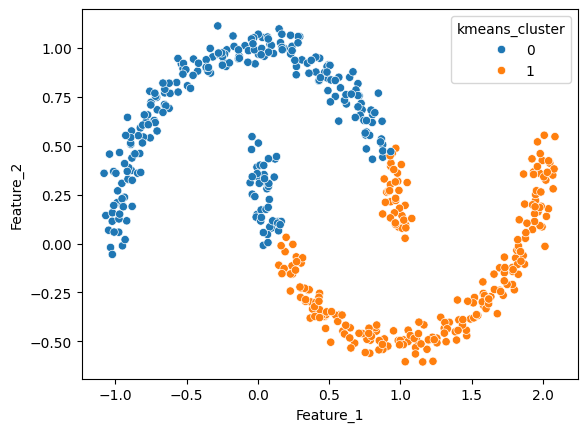

In [23]:
sns.scatterplot(x = df['Feature_1'],y=df['Feature_2'],hue=df['kmeans_cluster'],palette='tab10')

In [24]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [25]:
df['dbscan_labels'] = dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

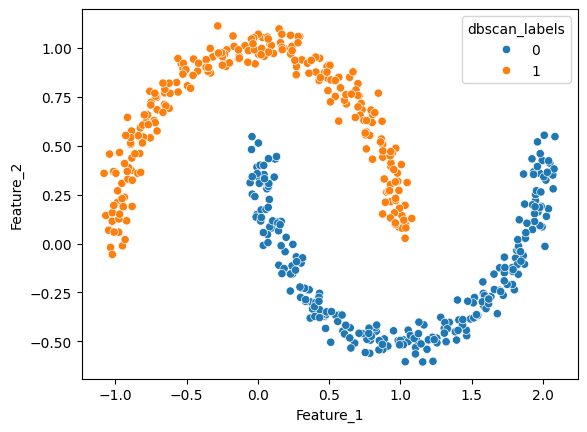

In [26]:
sns.scatterplot(x = df['Feature_1'],y=df['Feature_2'],hue=df['dbscan_labels'],palette='tab10')